In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv("df_scaled.csv")
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,Max 8-Hour O3,ozone_concern,ozone_threshold,Cook,Dallas,Harris,Los Angeles,Maricopa,Miami-Dade,Orange,Queens,Riverside,San Diego,greater3.26,less3.26
0,-1.175278,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,-1.745555,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,-1.999012,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,-1.872284,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,-1.492099,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [2]:
!pip install imblearn

In [3]:
#define X, y variables for model
y = df['ozone_concern']
X = df.loc[:, df.columns != 'ozone_concern']

In [4]:
#balancing dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, flip_y=0, random_state=1)

counter = Counter(y)
print(counter)

oversample = SMOTE()
X,y = oversample.fit_sample(X,y)

counter = Counter(y)
print(counter)




Counter({0: 5000, 1: 5000})
Counter({0: 5000, 1: 5000})


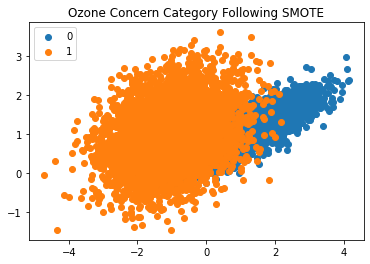

In [25]:
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
plt.title("Ozone Concern Category Following SMOTE")
plt.savefig("scatter_0_1")
pyplot.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=5)

clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(X_train, y_train)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(X_test), y_test))

0.8876


In [7]:
y_pred = clf.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


In [8]:
#Cross-Validation:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.897


In [9]:
#Confusion Matrix  
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)  #the confusion matrix actually looks like I expected it too!

#correct predictions: 1132 + 125 = 1257
#incorrect predictions: 156 + 1087 = 1243
#seems balanced.

[[1132  125]
 [ 156 1087]]


In [10]:
#model accuracy
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


In [11]:
#Classification Report 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#high percentage to base ozone-related air health concerns based on county, month of year, and population

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1257
           1       0.90      0.87      0.89      1243

    accuracy                           0.89      2500
   macro avg       0.89      0.89      0.89      2500
weighted avg       0.89      0.89      0.89      2500



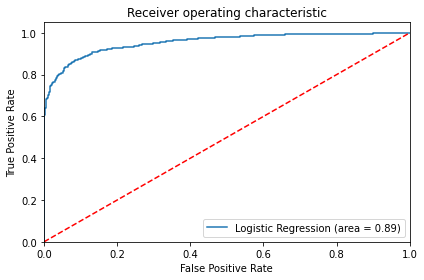

In [12]:
#ROC, AUC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.tight_layout()
plt.savefig("ROC_AUC.png")
plt.show()  #that's a good looking ROC, lots supporting the TPR

In [13]:
#CV gridsearch "blackbox"
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.1, 1, 10, 100]}
clf = LogisticRegression()
logreg_cv = GridSearchCV(estimator = clf, 
                    cv = 5, param_grid = param_grid)
logreg_cv.fit(X_test, y_test)
print(accuracy_score(logreg_cv.predict(X_test), y_test))
print(logreg_cv.best_params_)
print(logreg_cv.best_score_)

0.8896
{'C': 0.1}
0.8904


In [14]:
#two additional models? Decision Tree, Random Forest (2hours?)
#adjusting categories in models?
#model paramters?

In [15]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_leaf_nodes=10,random_state=42)
DT.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=42)

In [16]:
y_pred_DT = DT.predict(X_test)

y_pred_DT[:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

In [17]:
y_test[:10]

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0])

In [18]:
accuracy_score(y_test,y_pred_DT)


0.8856

In [26]:
print(classification_report(y_test, y_pred_DT))


              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1257
           1       0.92      0.84      0.88      1243

    accuracy                           0.89      2500
   macro avg       0.89      0.89      0.89      2500
weighted avg       0.89      0.89      0.89      2500



In [19]:
#RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix
RFC = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = RFC.fit(X_train, y_train)
y_pred = model_res.predict(X_test)
y_pred_prob = model_res.predict_proba(X_test)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

In [20]:
print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.899
Random Forest: f1-score=0.899


In [21]:
print(cm)

[[1145  112]
 [ 141 1102]]


Confusion matrix, without normalization
[[1145  112]
 [ 141 1102]]
Normalized confusion matrix
[[0.91 0.09]
 [0.11 0.89]]


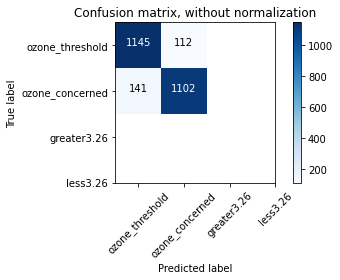

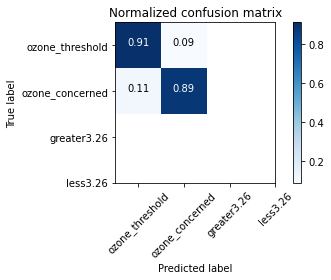

In [29]:
class_names=['ozone_threshold','ozone_concerned', 'greater3.26','less3.26']

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
#plt.savefig('figures/RF_cm_multi_class.png')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
#plt.savefig('figures/RF_cm_proportion_multi_class.png', bbox_inches="tight")
plt.show()